<a href="https://colab.research.google.com/github/shi093/python_widget/blob/main/Daily_Horoscope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read your daily horoscope in Python!

This is a tool for reading your daily horoscope. Run each code block in sequence and you will be able to choose your star sign by clicking the button below the image of your horoscope sign (or star sign). The results include your mood, lucky number, lucky time, lucky color, compatibility with other signs, and the description of your sign for yesterday, today and tomorrow.

Step1: install PyAztro package

PyAztro is a Python package for fun. It provides your daily horoscope read which is updated everyday at midnight GMT (Greenwich Mean TIme). 

In [ ]:
!pip install pyaztro

Step 2: Grab horoscope sign images from the web.

In [ ]:
from PIL import Image
import requests

url = "https://www.horoscope.com/images-US/signs/profile-aries.png"
im_aries = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-taurus.png"
im_taurus = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-gemini.png"
im_gemini = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-cancer.png"
im_cancer = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-leo.png"
im_leo = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-virgo.png"
im_virgo = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-libra.png"
im_libra = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-scorpio.png"
im_scorpio = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-sagittarius.png"
im_sagittarius = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-capricorn.png"
im_capricorn = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-aquarius.png"
im_aquarius = Image.open(requests.get(url, stream=True).raw)
url = "https://www.horoscope.com/images-US/signs/profile-pisces.png"
im_pisces = Image.open(requests.get(url, stream=True).raw)

Step 3: Create a variable to hold the horoscope images and the corresponding date ranges.

In [ ]:
image_name = []
image_name.append({'name':'Aries', 'image':im_aries, 'date': 'Mar 21-Apr 20'})
image_name.append({'name':'Taurus', 'image':im_taurus, 'date': 'Apr 21-May 20'})
image_name.append({'name':'Gemini', 'image':im_gemini, 'date': 'May 21-Jun 21'})
image_name.append({'name':'Cancer', 'image':im_cancer, 'date': 'Jun 22-Jul 22'})
image_name.append({'name':'Leo', 'image':im_leo, 'date': 'Jul 23-Aug 22'})
image_name.append({'name':'Virgo', 'image':im_virgo, 'date': 'Aug 23-Sep 22'})
image_name.append({'name':'Libra', 'image':im_libra, 'date': 'Sep 23-Oct 22'})
image_name.append({'name':'Scorpio', 'image':im_scorpio, 'date': 'Oct 23-Nov 22'})
image_name.append({'name':'Sagittarius', 'image':im_sagittarius, 'date': 'Nov 23-Dec 21'})
image_name.append({'name':'Capricorn', 'image':im_capricorn, 'date': 'Dec 22-Jan 19'})
image_name.append({'name':'Aquarius', 'image':im_aquarius, 'date': 'Jan 20-Feb 18'})
image_name.append({'name':'Pisces', 'image':im_pisces, 'date': 'Feb 19-Mar 20'})

Step 4: Generate the user interface of the tool.

,,,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

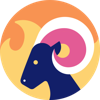


Mar 21-Apr 20



Button(description='Aries', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

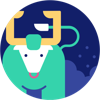


Apr 21-May 20



Button(description='Taurus', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

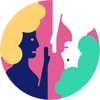


May 21-Jun 21



Button(description='Gemini', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

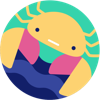


Jun 22-Jul 22



Button(description='Cancer', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

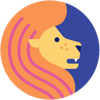


Jul 23-Aug 22



Button(description='Leo', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

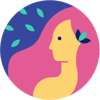


Aug 23-Sep 22



Button(description='Virgo', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

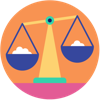


Sep 23-Oct 22



Button(description='Libra', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

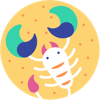


Oct 23-Nov 22



Button(description='Scorpio', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

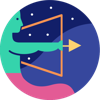


Nov 23-Dec 21



Button(description='Sagittarius', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

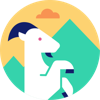


Dec 22-Jan 19



Button(description='Capricorn', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

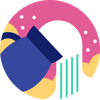


Jan 20-Feb 18



Button(description='Aquarius', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

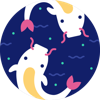


Feb 19-Mar 20



Button(description='Pisces', style=ButtonStyle())

<IPython.core.display.Javascript object>


Select your Star Sign by clicking the button



Output()

In [ ]:
import pyaztro
from google.colab import widgets
import ipywidgets
from IPython.display import display, clear_output
import pandas as pd

pd.set_option("max_colwidth", None)

output = ipywidgets.widgets.Output()

days = ['yesterday', 'today', 'tomorrow']
data_type = ['Date', 'Mood', 'Compatibility', 'Lucky number', 'Lucky time', 'Lucky color', 'Description']
df = pd.DataFrame(data_type,columns=[''])

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    clear_output()
    sign_name = str(b.description)
    for i in range(0,3):
      sign_info = pyaztro.Aztro(sign=sign_name, day=days[i])
      df[days[i]] =[sign_info.current_date, sign_info.mood, sign_info.compatibility, sign_info.lucky_number, sign_info.lucky_time, sign_info.color, sign_info.description]

    print('\n', 'Sign: ', str(b.description), '\n')
    display(df)

button_list = []
for i in range(0,12):
  button = ipywidgets.widgets.Button(description=image_name[i]['name'])
  button.on_click(on_button_clicked)
  button_list.append(button)    

grid = widgets.Grid(1, 6, header_row=True, header_column=True) 
newsize = (100, 100)
for (row, col) in grid:
  index = row*6+col
  print("\n")
  display(image_name[index]['image'].resize(newsize))
  print("\n"+image_name[index]['date']+"\n")
  display(button_list[index])
for (row, col) in grid:
  index = row*6+col
  print("\n")
  display(image_name[index+6]['image'].resize(newsize))
  print("\n"+image_name[index+6]['date']+"\n")
  display(button_list[index+6])
print('\nSelect your Star Sign by clicking the button\n')
display(output)